摘自Medium [Mobile Image Blur Detection](https://medium.com/snapaddy-tech-blog/mobile-image-blur-detection-with-machine-learning-c0b703eab7de)

In [144]:
import numpy as np 

from scipy.ndimage import variance
from scipy.ndimage import mean
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import laplace, sobel
from skimage.transform import resize
from matplotlib.pyplot import plot as plot

<code object variance at 000000000A933F30, file "C:\Users\huangzhongjie\AppData\Local\Continuum\anaconda2\lib\site-packages\scipy\ndimage\measurements.py", line 642>


(183L, 275L, 3L) 236 0
(400L, 601L, 3L)
0.3408223160623905 0.0


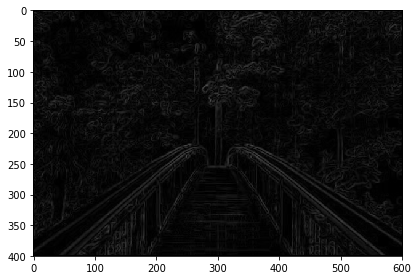

In [147]:
path = "D:\\Data\\Video\\blur\\sharp9.jpg"
img = io.imread(path)
print (img).shape, np.amax(img), np.amin(img)
# Resize image
img = resize(img, (400, int((img.shape[1] * 400) /img.shape[0])))
print img.shape

# Grayscale image
img = rgb2gray(img)
# Edge detection
edge_laplace = laplace(img, ksize=3)
edge_laplace = sobel(img)
print np.amax(edge_laplace), np.amin(edge_laplace)
io.imshow(edge_laplace)

In [148]:
# Print output
lbl, nlbl = ndimage.label(edge_laplace)
print ('Variance_not0: {}'.format(ndimage.variance(edge_laplace, lbl)))
print("Variance: {}".format(variance(edge_laplace)))
print("mean: {}".format(mean(edge_laplace)))
print("Maximum : {}".format(np.amax(edge_laplace)))

Variance_not0: 0.00120596074196
Variance: 0.00121039644916
mean: 0.041516018687
Maximum : 0.340822316062


In [164]:
import os
blur_path = "D:\\Data\\Video\\blur\\blur%i.jpg"
sharp_path = "D:\\Data\\Video\\blur\\sharp%i.jpg"
xs_blur, ys_blur= list(), list()
xs_sharp, ys_sharp= list(), list()
for i in range(1, 16):
    img_blur_path = blur_path%i
    img_blur = io.imread(img_blur_path)
    
    img_blur = resize(img_blur, (400, int((img_blur.shape[1] * 400) /img_blur.shape[0])))
    img_blur = rgb2gray(img_blur)
    edge_laplace_blur = laplace(img_blur, ksize=11)
    edge_laplace_blur = sobel(img_blur)
    
    x_blur = mean(edge_laplace_blur)
    x_blur = variance(edge_laplace_blur)
    lbl, nlbl = ndimage.label(edge_laplace_blur)
    x_blur = ndimage.variance(edge_laplace_blur, lbl)
    y_blur = np.amax(edge_laplace_blur)

    print ('blur: {}, mean: {}, var: {}, max: {}'.format(os.path.basename(img_blur_path),mean(edge_laplace_blur), x_blur, y_blur))

    xs_blur.append(x_blur)
    ys_blur.append(y_blur)

for i in range(1, 16):
    img_sharp_path = sharp_path%i
    img_sharp = io.imread(img_sharp_path)
    img_sharp = resize(img_sharp, (400, int((img_sharp.shape[1] * 400) /img_sharp.shape[0])))
    img_sharp = rgb2gray(img_sharp)
    edge_laplace_sharp = laplace(img_sharp, ksize=11)
    edge_laplace_sharp = sobel(img_sharp)
    
    x_sharp = mean(edge_laplace_sharp)
    x_sharp = variance(edge_laplace_sharp)
    lbl, nlbl = ndimage.label(edge_laplace_sharp)
    x_sharp = ndimage.variance(edge_laplace_sharp, lbl)
    y_sharp = np.amax(edge_laplace_sharp)
    print ('sharp: {}, mean: {}, var: {}, max: {}'.format(os.path.basename(img_sharp_path),mean(edge_laplace_sharp), x_sharp, y_sharp))

    xs_sharp.append(x_sharp)
    ys_sharp.append(y_sharp)
    



blur: blur1.jpg, mean: 0.00854532492076, var: 0.000106681771331, max: 0.228754444973
blur: blur2.jpg, mean: 0.00986870762738, var: 0.000189261352969, max: 0.185249276234
blur: blur3.jpg, mean: 0.018921617566, var: 0.0003254711889, max: 0.21782421226
blur: blur4.jpg, mean: 0.00887811809221, var: 0.000113213442122, max: 0.115841535687
blur: blur5.jpg, mean: 0.0144023233597, var: 0.000671375650114, max: 0.369096850692
blur: blur6.jpg, mean: 0.0276309303353, var: 0.000966026377891, max: 0.323056517925
blur: blur7.jpg, mean: 0.0274816351023, var: 0.00154936607837, max: 0.533601666793
blur: blur8.jpg, mean: 0.0311475057612, var: 0.00145960987238, max: 0.435176591591
blur: blur9.jpg, mean: 0.0161016770745, var: 0.000916186370497, max: 0.393106484115
blur: blur10.jpg, mean: 0.047408314537, var: 0.00453927811954, max: 0.629529257997
blur: blur11.jpg, mean: 0.0260438613859, var: 0.00168154065724, max: 0.480593001268
blur: blur12.jpg, mean: 0.0410108184928, var: 0.00256095154012, max: 0.457084838

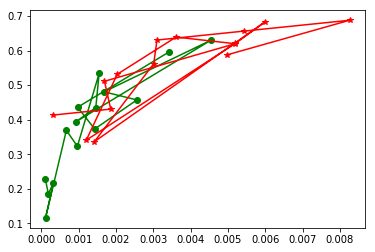

In [165]:
plot(xs_blur, ys_blur, color='green', marker='o')
plot(xs_sharp, ys_sharp, color='red', marker='*')
